# Case Study: Linear and Logistic Regression in Image Processing Tasks



## What we will discuss today...

### 1. Basic Introduction of Regression

-  #### a. What is regression?

-  #### b. Applications of Regression

### 2. Case Study: Basic Geometrical Shape Detection in Images
  
   

-  ####   a. Object Detection Problem?      

- ####   b. How to prepare dataset?      

- ####   c. What kind of features required?  

- ####   d. Shape signatures as the features.   

- #### e. Prepare feature set for traiining our model 

- #### f. Train our Logistic Regression model to predict shapes in the Images.

- #### g. Test the classifier on images.

### 3. Case Study: Color image to Gray image conversion using Linear Regression 

- #### Data Preparation
- #### Model Training 
- #### Model Testing

# What is Regression?

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). Regression analysis is an important tool for modelling and analyzing data. Now when we talk about linear regression the relationship between dependent and independent variable can be describe by a linear line model by simple line equation; while in case of non linear regression the relationship can be describe using a curve modeled by some polynomial equation as follow:


<img src="linear-nonlinear-relationships.png">

Now as our current scope is limited to linear regression only, we will emphasize two flavours of it

- Simple linear regression
- Logistic Regression

Now while simple linear regression follows a straight line equation to fit the relationship between input and output variable; logistic regression gives probabilties at the output.

Equation for Linear Regression

<img src="multiple-linear-regression-16-638.jpg">

While we can write explanation of logistic regression with context of linear equation as follows:

<img src="LogReg_1.png">

so you can see when we apply sigmoid function to the output of linear regression it get converts into class probabilities, which can easily be used for class predictions.

# Application of Regression

## Prominent applications of linear regression are :

1. Financial forecasting
2. Software cost prediction, software effort prediction and software quality assurance.
3. Restructuring of the budget : Organization or Country
4. Crime Data Mining : Predicting the crime rate of a states based on drug usage, number of gangs, human trafficking, and Killings.

## Applications of Logistic Regression :

1. Image Segmentation and Categorization
2. Geographic Image Processing
3. Handwriting recognition
4. Healthcare : Analyzing a group of over million people for myocardial infarction within a period of 10 years is an application area of logistic regression.
5. Prediction whether a person is depressed or not based on bag of words from the corpus seems to be conveniently solvable using logistic regression and SVM.

# Case Study: Object Detection and Classification using Regression

## What is an Image ?

An image is just another numerical matrix which you have seen in your maths classes earlier; you can apply any algebric operation on it as you can apply on any other matrix; these operations may be simple maths such as addition, subtraction, multiplication etc. or it may be any complex analysis such as singular vector decomposition or principle component analysis. we can represent an image as following:

<img src="lincoln_pixel_values.png">

## Object Detection Problem in Image processing

Object detection is the problem of finding and classifying a variable number of objects on an image. The important difference is the “variable” part. In contrast with problems like classification, the output of object detection is variable in length, since the number of objects detected may change from image to image.

#### Application of Object detection and classification

- Tracking objects
- Video surveillance
- Pedestrian detection
- Anomaly detection
- People Counting
- Self driving cars
- Face detection

<img src="ObjectDetection.png">

### So what we will going to do?

Well; we will going to work on a very basic yet very interesting and Practical problem which can be consider as an introduction to the world of object detection.

our target is to get following task achieved:

Our input will be:

<img src="various shapes.png">

And Output will be:

<img src="various_shapes_Annot.png">

### So How the hell we gonna do that!!!

Well answer is quite simple for that, we will train a Classifier to this work for us!

But before moving forward lets see how we can deal with this problem using a Machine learning based frame work

## Generalize Machine Learning framework
<img src="GeneralizedML.png">

We will start our journey with data preparation

# Data Preparation

We will train a shape classifier for 4 different shapes i.e. Circles, Penatgons, Tiangles and Rectangles, for making a simple training data we will use microsoft paint brush; with the use of this application we will create 4 different images which will look like this:

<img src="Circles.png">
<img src="Pentagons.png">
<img src="Rectangles.png">
<img src="Triangles.png">

If you will see we have used white color for our shapes and black for the background, our task will be extract individual shape from the image and extract their boundary structure.

# Shape Signature as the features

We will use shape signatures as the features of the object, features in image processing are the information which helps to differentiate between two regions present in the image for example we can use color values as features for differentiating between red circle and blue circle, or may be we can use their relative positions in the image for this purpose.

As we are currently working with shape identification we will use shape signatures for that.

### What is shape signature?

Well shape signature is nothing but the difference of each point lying on the object boundary with center of the object, we can show this with the help of following figure:

As you can see the center of the object is average value of all boundary points.
Difference between boundary coordinate and center will be calculated with the help of euclidean distance. 
<img src="Signature.jpg">

Figure above shows an interpretation of the shape signatures where you can see distances for circle is same for all the points of the boundary while in case of rectangle we are getting different peaks in the curve.

to find out the differences between center and boundary we will use euclidean distance metric:

<img src="euclidean.png">

where x1 and y1 are the centers and x2 and y2 are the boundry points.

we can write a Python method to get these shape signatures:

In [4]:
#Import NumPy library for algebric operations on matrices and arrays
import numpy as np

#Here is the method to findout euclidean distance 
def Signature(boundary):
    
    #Mean of the object boundaries will be the center of the object
    centroid = np.mean(boundary,axis=0)
    
    #Here is the distance metric
    distance = np.sqrt(np.sum(np.square(boundary-centroid),axis=1))
    return distance,centroid

But how to extract the boundary of the object???

Well for that we will follow these steps:

1. Read the Images
2. If there are color images, convert them into gray scale.(Because it is very difficult to work on color images).
3. Threshold the images such that all the objects have white color and background have black color.
4. Apply OpenCV function to get individual object's boundary.
5. Get object signature.

For all image related operations we will going to use OpenCV library, which consist of all image processing related fucntions and uitilities to load and show the images.

we will write a function which will give us object's signature whenever we will pass the images to it.
Functions listening will be as follows:

In [5]:
#This Method will give us signatures of shapes present in the input Image
def getFeatures(im,npoints=32,isBinary=False,backGround='Black'):
    
    # IM is the input image. it is a numpy array.
    # NPOINTS are the number of points we want in the signature array.
    # ISBINARY is the flag which determine whether the input image is a binary image or not
    
    #Lets start with extracting the image shape information
    imshape = np.shape(im)
    
    #We will use shape information to determine whether the image is a color image or a binary one.
    if imshape[2]==3:
        
        #If image is a color image it will have 3 Channels so we will convert it into single channel image.
        im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)                            
    
    # If input image is not a binary image we will threshold it here to separate back ground and foreground
    if backGround=='White':Method = cv2.THRESH_BINARY_INV
    else:Method = cv2.THRESH_BINARY
            
    if not isBinary:        
        _,im = cv2.threshold(im,200,255,Method)    
    
    #In this line we will extract boundary information for different objects present in the image,
    #it will store boundary information regarding all the objects in a list so that we can extract it using simple indexing.
    _, contours, _= cv2.findContours(im,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)    
    
    #Once we got the boundary we can store these boundaries in an array 
    features = []
    
    #We will also store the centers of each object for future usage
    centers =[]
    
    #Now Here we will find out signature of each individual shape
    for contour in contours:        
        contour = np.reshape(contour,[len(contour),2])
        
        #Here we will call our Signature function we have written earlier it will give us signature for each object
        sig,cent = Signature(contour)
        
        #Normalize signature with its maximum distance value so that all values will be between 0 and 1
        #It will also helps us to get robustness for the variation in object size.
        sig = sig/np.max(sig)
        points = np.linspace(0, len(sig)-1, npoints,dtype="uint16")
        
        # we will select required number of points from the whole signature from the regular interval
        #It will help us to reduce the dimension of the final feature set
        sigComp = sig[points]
        
        #Append each signature to the final feature set
        features.append(sigComp)
        
        #Append each center to the final center set
        centers.append(cent)
    #Here we will return the extracted values. 
    return np.array(features),np.array(centers),contours

Now lets quickly load an image and see how our signature are look like:

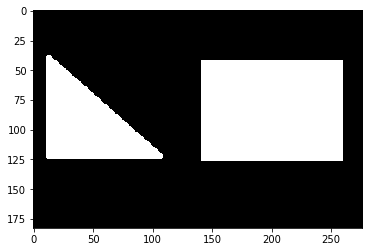

In [6]:
#First we will load an Image using opencv library
import cv2
%matplotlib inline
#We will use matplotlib to show the images
import matplotlib.pyplot as plt

#Here we read the image from the directory
im = cv2.imread('SignatureTest.png')

#Show the image loaded
plt.imshow(im)

So as you can see there are two objects in the image one is triangle and other is rectangle, now we will pass this image to our function getFeatures() and plot the signatures for both the shapes 

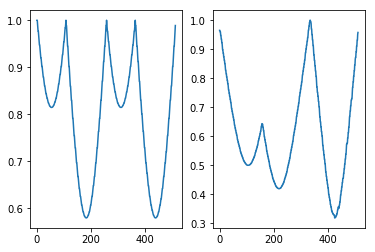

In [7]:
#Now lets find shape signatures of the image
sign,_,_ = getFeatures(im,512)

#Now once we got the signatures lets plot it and see how we doing
for i in range(len(sign)):    
    plt.subplot(1,2,i+1)
    plt.plot(sign[i])    

Can you see there!! we can clearly see difference in two images; in one plot there are 4 peaks while in the other one there are 3 peaks. it shows us that our code is working as expected.

So I think we are already to create our Training data from those 4 shape images with 4 class; for that we will write following function it will create training set in following steps:

1. Read each shape image from the given path.
2. Extract contours for the shapes present in the image.
3. Get Signature features for each object present in the image.
4. Append all the extracted features from all the training shapes into one matrix.

Following function will implement exactly same steps:

In [8]:
def CreateDataset():
    
    #Let's start with defining the image name which consist shape variants
    images2read = ['Pentagons.png','Rectangles.png','Triangles.png','Circles.png']
    
    #We will extract 512 point from the signature so that maximum information can be utilize 
    npoints=512
    
    #Create an empty list to store class names
    labels = []    
    
    #This array will store all the signatures from all the images.
    data = np.array(np.zeros((1,npoints),dtype='uint16'));
    
    #Intialize a variable which takes account of class label
    class_var = 0
    
    #Lets start reading images one by one and extract features out of them    
    for image_name in images2read: 
        
            #Read image by name
            im = cv2.imread(image_name)
            
            #Extract Features from the Image
            features,_,_ = getFeatures(im, npoints,True)
            
            #Append the extracted features into final feature set
            data = np.append(data,features,axis=0)            
            
            #Same we will do for class variable
            lab = [class_var for i in range(len(features))]
            
            #Once done with one kind of shapes increase the class label
            class_var+=1            
            
            #Append labels into final label set
            labels = np.append(labels,lab)
            
    data = np.delete(data, (0), axis=0)
    
    #Return data and label matrices
    return np.array(data),np.array(labels)

Let's quickly check whether we implemented our functions correctly or not

Data shape:  (22, 512)
Label shape:  (22,)


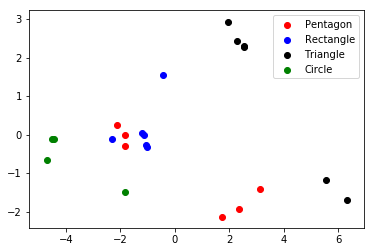

In [9]:
#Lets create two variables to store the data set and labels
data,labels = CreateDataset()

#Check the shape of data
print('Data shape: ',np.shape(data))
print('Label shape: ',np.shape(labels))

from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd

# X = pd.DataFrame(data)
# X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(data))

plt.scatter(transformed[labels==0][0], transformed[labels==0][1], label='Pentagon', c='red')
plt.scatter(transformed[labels==1][0], transformed[labels==1][1], label='Rectangle', c='blue')
plt.scatter(transformed[labels==2][0], transformed[labels==2][1], label='Triangle', c='black')
plt.scatter(transformed[labels==3][0], transformed[labels==3][1], label='Circle', c='Green')

plt.legend()
plt.show()

So as you can see we are getting data matrix with the shape of 22 rows and 512 columns as expected while label matrix with 22 rows and one column. so we are good to go for the training of our classifier.

Now we will write one more method to train the dataset, as we are working with classification problem, we will use logistic regression as the classifier of choice. we will use scikit learn library for that, it an extremly ppopular library amongst data science community for its easy to use syntex.

Following are the steps for training

1. Load the images and create signature based feature set.
2. Create a logistic classifier object.
3. Train the classifier with the default parameters.
4. Check the predictions are correct or not.
5. Store the classifier on the disk. 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

def TrainClassifier():
    
    #Create training set using CreateDataset method
    sign,labels = CreateDataset()
    sign_train,sign_test,labels_train,labels_test = train_test_split(sign,labels,test_size=0.33,random_state=42)
    #Create the LR classifier object
    model = LogisticRegression()
    
    #Let's train the classifier with its default parameters
    model.fit(sign_train, labels_train)
    
    print("Model Trained Succesfully!!!")
    #Get class probabilties on the training data
    prob = model.predict_proba(sign_test)    
    
    #Choose class label with the highest probability
    predictions = np.argmax(prob,1)
    
    #Print the predicted class labels with the Actual ones for comparison
    for pred,lab in zip(predictions,labels_test):
        print('Predicted: %.f Actual: %.f'%(pred,lab))
    
    print("\nError made by our classifier on test set is: %.2f"%mean_squared_error(labels_test,predictions))
    print("Variance score of our model: %.2f"%r2_score(labels_test,predictions))
    
    
    #If everything looks fine store the classifier on the disk
    model_path = 'D:/GoogleDrive/TechDocuments/Webinars/LogisticRegression/RegressionNoteBook/shape_logistic.sav'    
    pickle.dump(model,open(model_path,'wb'))
    return model

So this is the time to train our classifier on training set lets see what happens

In [13]:
model = TrainClassifier()

Model Trained Succesfully!!!
Predicted: 0 Actual: 0
Predicted: 2 Actual: 2
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 2 Actual: 2
Predicted: 0 Actual: 0
Predicted: 3 Actual: 3
Predicted: 1 Actual: 1

Error made by our classifier on test set is: 0.00
Variance score of our model: 1.00


So you can clearly see above that each instance is perfectly classified by our classifier with default parameters. Lets see what was the default hyper-parameters of model.

In [14]:
print("Let's see the hyper-parameters for the model:\n\n",model)
print("\nFollowing are tthe regression Coefficients",model.coef_)

Let's see the hyper-parameters for the model:

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Following are tthe regression Coefficients [[ 0.05160711  0.05160711  0.04668892 ...  0.03060625  0.04256087
   0.04981077]
 [ 0.03128712  0.03128712  0.0295697  ...  0.01229968  0.01798554
   0.02302899]
 [ 0.07645554  0.07645554  0.07940559 ...  0.08606493  0.08277011
   0.08084547]
 [-0.26952856 -0.26952856 -0.26602688 ... -0.23744691 -0.25446522
  -0.26480558]]


So we are all set to test our classifier to the test image. following will be the steps of testing:

1. Load classifier from the defined path.
2. Read test image.
3. Extract shape features for the objects present in the image.
4. Get class probabilties extracted feature instances using trained classifier.
5. Choose class label with highest probability as prediction of classifier.
6. To detect outlier we can put some threshold on the probabilty.

In [15]:
def test():
    
    #Lets first define number of points required in signature(it must be same as training data)
    npoints = 512
    
    #Location of test Image
    testPath = 'various shapes.png' 
    model_path = 'shape_logistic.sav'
    
    #Read the image
    im = cv2.imread(testPath)      
    
    #Show image 
    plt.figure(figsize=(14,14))
    plt.imshow(im)
    
    #Extract features from the image
    features,centers,contours = getFeatures(im, npoints,False,backGround='White')
    
    #Load the trained Logistic Regression model
    model = pickle.load(open(model_path,'rb'))
    
    #Predict probabilities for input shapes
    prob = model.predict_proba(features)
    
    #Select class labels with highest class probabilities
    predictions = np.argmax(prob,1)    
    
    #Following function will create bounding boxes and put text on images
    for i in range(len(predictions)):      
        
        #Maximum class probabilty to determine outliers
        mx_prob = np.max(prob[i])
        
        #Use boundary coordinates to get bounding box coordinates
        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)        
        
        #Outlier Detection: If any object have probabilities less than 60% put it as unknown object
        if mx_prob<=0.6:
            text='Unknown'
            BoxColor = (255,0,0)
        else:
            #Class annotations
            BoxColor = (0,255,0)  
            if predictions[i]==0:text = 'Pentagon'
            if predictions[i]==1:text = 'Rectangle'
            if predictions[i]==2:text = 'Triangle'
            if predictions[i]==3:text = 'Circle'
        
        #Create annotations
        cv2.putText(im,text,(x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
        im = cv2.rectangle(im,(x,y),(x+w,y+h),BoxColor,2)
    
    #Show annotated images
    plt.figure(figsize=(14,14))
    plt.imshow(im)
    

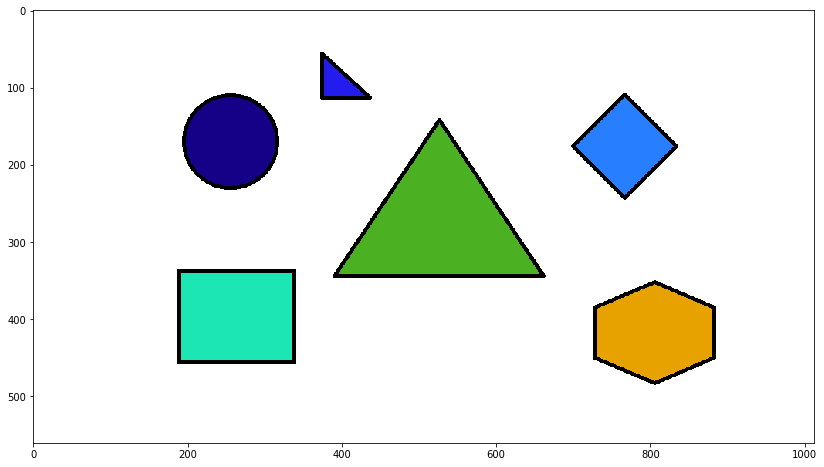

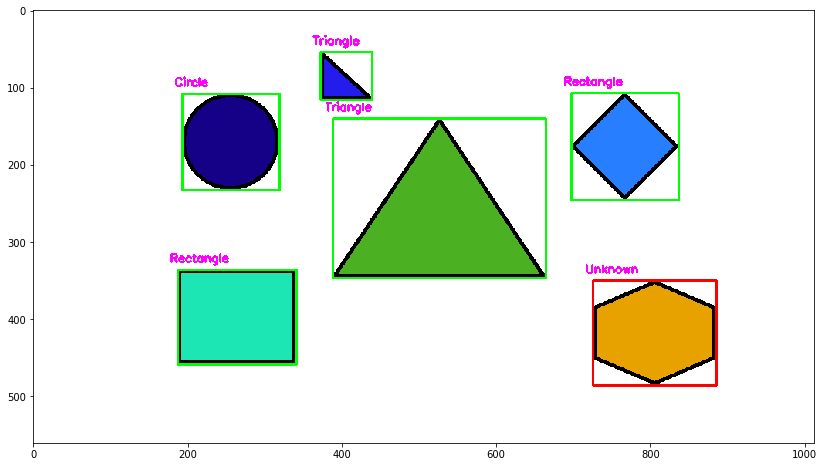

In [16]:
test()

# Case Study- RGB  to Gray Image conversion using Linear Regression

Before discussing this lets see how color pixels looks like

<img src="ColorImageRepresentation.png">

but why we need to convert a color image into gray image? Answer is simple; because Gray scale is simply reducing complexity: from a 3D pixel value (R,G,B) to a 1D value. Many tasks do not fare better with 3D pixels (eg. edge detection) or feature extraction as we have seen in previous case study. 

One more important thing is; if we consider an 8 bit gray image, its pixel values will ranges from 0 to 255 where each pixel have one arbitrary value from the range; while in case of 8 bit color image every pixel will have 3 arbitrary values from the range which makes task of computation very complex by increasing the computation parameters.  

So what will you do to convert a color image into gray image?

by the way there is a pretty simple formula for this conversion where you just need to multiply some fixed scallar cofficients to R, G and B channels and after summing up them we would get a single value for each pixel.

 $$ Gray Value = 0.2126*R + 0.7152*G + 0.0722*B $$ 
 
 and when you apply this formula to the pixel values you will get output like this:
 
 

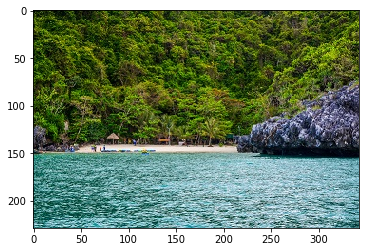

In [17]:
import cv2
import numpy as np
im = cv2.imread('Wall.jpg')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

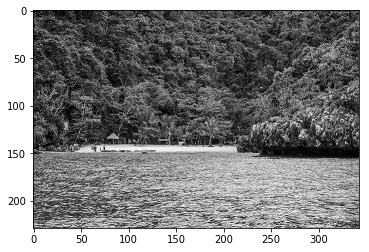

In [18]:
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

But do you find any fun in this? I bet you dont. 
We will make this problem more intersting; we will use linear regression model to compute the conversion values for usand then we will apply that model to test images to convert those image into gray scale. Lets see how to do this.

Following will be the steps:

1. Data preparation for training the model.
2. Train a linear regression model on image data.
3. Apply model to convert color images into gray.

Following method will do this for us:

Shape:  (128, 128, 3)

Error made by the model over test set is: 0.00

Variance of our model is: 1.00

Model Coefficients: 
 [[0.11413688 0.5869028  0.29901809]]


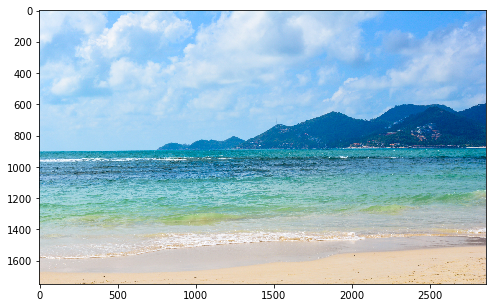

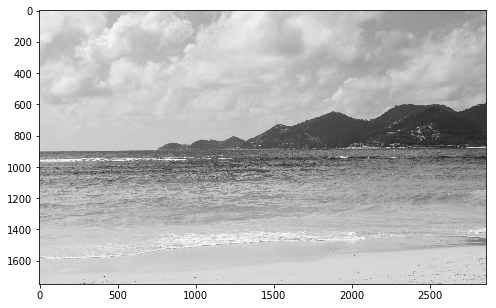

In [19]:
#Following method will help us to get our data and train model on it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
def grayDataTrain():
    
    #We will call model definition with is default parameters
    model = LinearRegression()
    
    #Read the image
    im = cv2.imread('Wall.jpg')
    
    #Resize it to reduce the dimensions
    im = cv2.resize(im,(128,128))
    
    #Check the dimensions
    sh = np.shape(im)
    print("Shape: ",sh)
    
    #Covert color image to gray for creating target variable
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    #Covert training data and target variable in the range of 0 to 255
    imData = np.reshape(im, (128*128,3)).astype("float32")/255.0
    
    gray = np.reshape(gray,(128*128,1)).astype("float32")/255.0
    
    train_data,test_data,train_labels,test_labels = train_test_split(imData,gray,test_size=0.33,random_state=42)
    
    #Fit a linear regression model
    model.fit(train_data, train_labels)
    
    #Model Evaluation
    gray_pred = model.predict(test_data)
    
    
    print("\nError made by the model over test set is: %.2f"%mean_squared_error(test_labels,gray_pred))
    print("\nVariance of our model is: %.2f"%r2_score(test_labels,gray_pred))
    return model

#Now this method will convert color image into gray
def rgb2gray(im,model):
    
    #Extract shape of the test image
    sh = np.shape(im)
    
    #Reshape it for our compatible dimension and convert the range between 0 to 255
    imData = np.reshape(im, (sh[0]*sh[1],3)).astype("float32")/255.0
    
    #Lets predict the output of our model
    gray = model.predict(imData)
    
    #Convert the values between 0 to 255 for visual purpose
    gray = np.uint8(255*np.reshape(gray,(sh[0],sh[1])))
    
    #Return the gray Image
    return gray
    
model = grayDataTrain()

print("\nModel Coefficients: \n",model.coef_)
im = cv2.imread('testGray.jpg')
gray = rgb2gray(im, model)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

plt.figure(figsize=(8,8))
plt.imshow(gray,cmap='gray')